# Assignment-4

In this assignment, we will walk through provided dataset to get to know kNN and PCA more. In task description we were told to find "insights" from data and to show it in a neat and comprehensive way so that our non-coder imaginary manager would be able to understand what and why we are doing what we are doing. Let's start!

## Univariate Visualization

As we have literally no idea about data neither from task description nor from coulmn names, it would be suitable to start with exploring each column.

In [1]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Let's read the dataset using pandas and see initial rows.

In [2]:
df=pd.read_csv('dataset.csv')
df.head()

,param_132,type,is_measured,normal_values,% of normal values,param dist.
0,464,AC,0,0.77,4,160
1,670,AC/DC,0,0.03,98,26
2,903,AC/DC,0,0.73,6,510
3,857,AC,0,0.40,47,802
4,7725,AC,1,0.58,31,729


What about quik information about dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   param_132           23011 non-null  int64  
 1   type                23011 non-null  object 
 2   is_measured         23011 non-null  int64  
 3   normal_values       23011 non-null  float64
 4   % of normal values  23011 non-null  int64  
 5   param dist.         23011 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.1+ MB


The dataset consisted of total 6 columns, 4 of which are numerical ones. We are not counting `is_measured` as a numerical because it is simple consists of 1 or 0s. 

In [4]:
cat_names=['type', 'is_measured']
cont_names=['param_132', 'normal_values', '% of normal values', 'param dist']

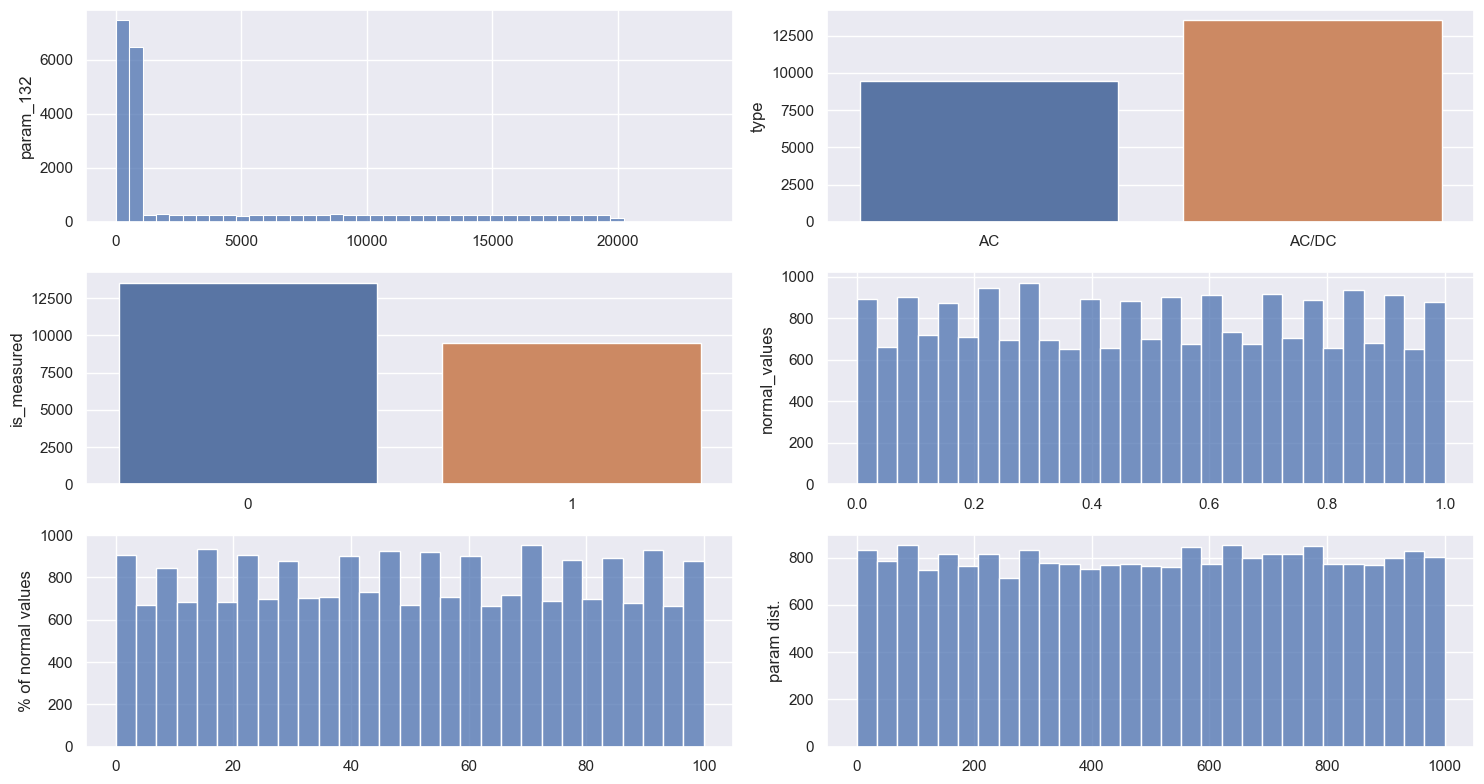

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

for idx, feat in enumerate(df.columns):
    ax = axes[int(idx / 2), idx % 2]
    if feat in cat_names:
        sns.countplot(x=feat, data=df, ax=ax);
        ax.set_xlabel("")
        ax.set_ylabel(feat)
    else:
        sns.histplot(x=feat, data=df, ax=ax)
        ax.set_xlabel("")
        ax.set_ylabel(feat)
fig.tight_layout();

Our of these features first 3 of them seems promising as it can convey information about our dataset.

## Multivariate Visualization

Now it is time to visualize multiple features at once. We are at least one step closer to validate our claim about importance of features because `type`and `param_132` features showing greater correlation while `normal_values` and `% of normal values` seeming completely independent from each other.

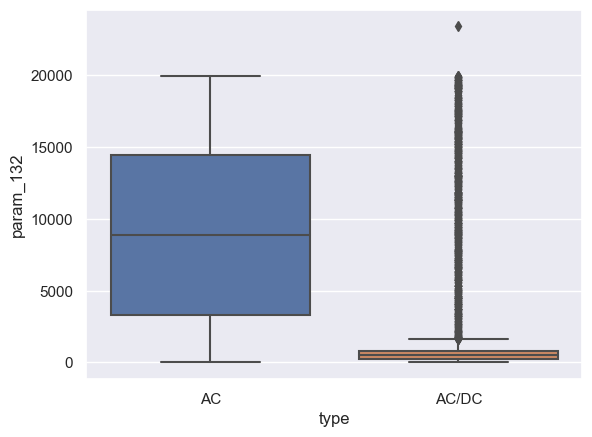

In [6]:
sns.boxplot(x='type', y='param_132', data=df);

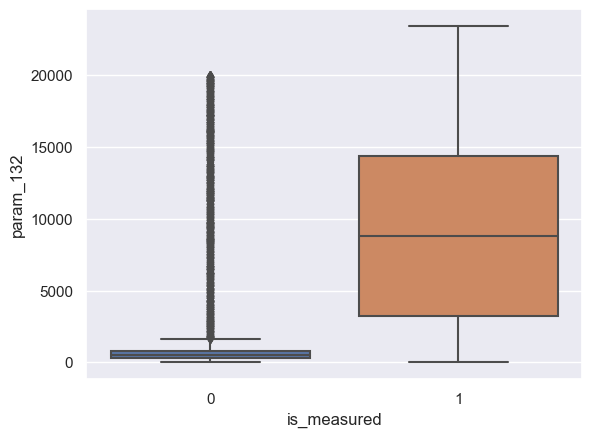

In [19]:
sns.boxplot(x='is_measured', y='param_132', data=df);

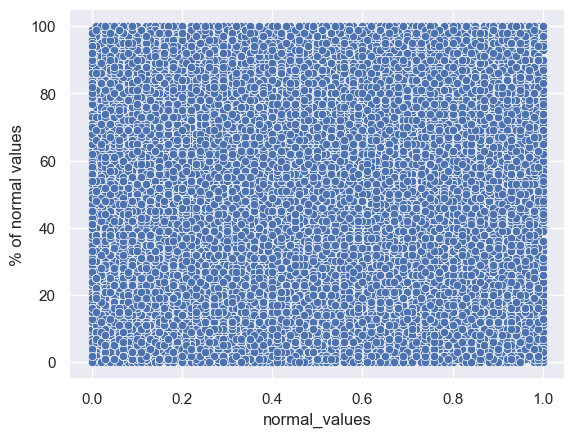

In [9]:
sns.scatterplot(x='normal_values', y='% of normal values', data=df);

Let's dig more into it:

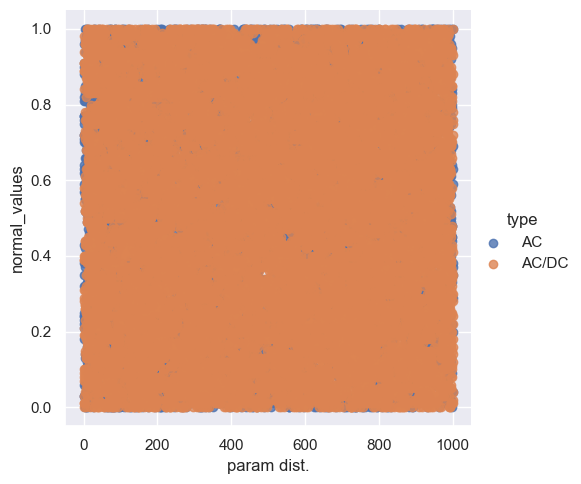

In [14]:
sns.lmplot(
    x="param dist.", y="normal_values", data=df, hue="type", fit_reg=False
);

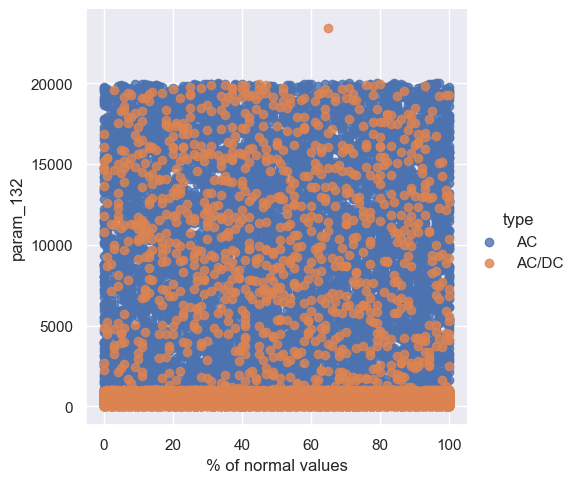

In [18]:
sns.lmplot(
    x="% of normal values", y="param_132", data=df, hue="type", fit_reg=False
);

Aha the correlation is very close to random and we found one outlier. Very interesting to observe why is that.

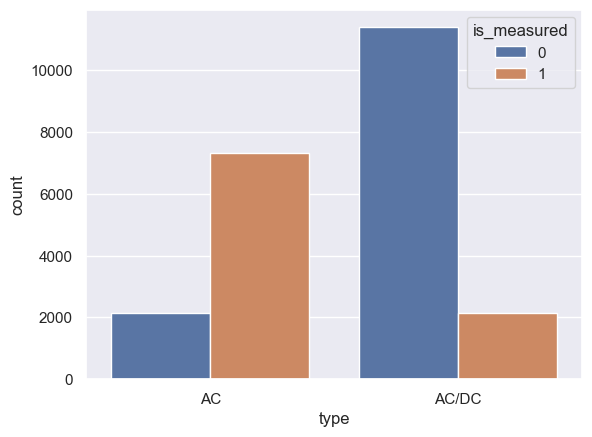

In [17]:
sns.countplot(x="type", hue="is_measured", data=df);

We have seen that AC type instances is more likely measured than AC/DC ones.

## Whole dataset visualizations

As we have pointd out that 3 of features seeming to convey information about data while other 3 ones seemingly created randomly. We'llagain make sure for this with heatmap.

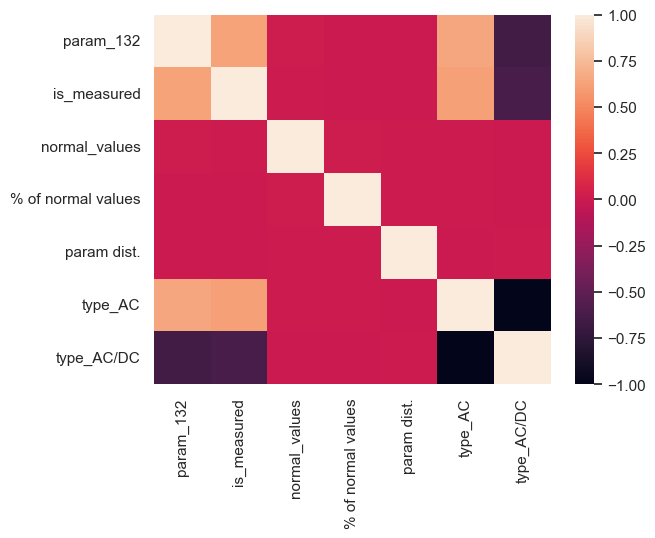

In [20]:
df=pd.get_dummies(df)

corr_matrix = df.corr()
sns.heatmap(corr_matrix);

Or we'll try to visualize it using PCA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


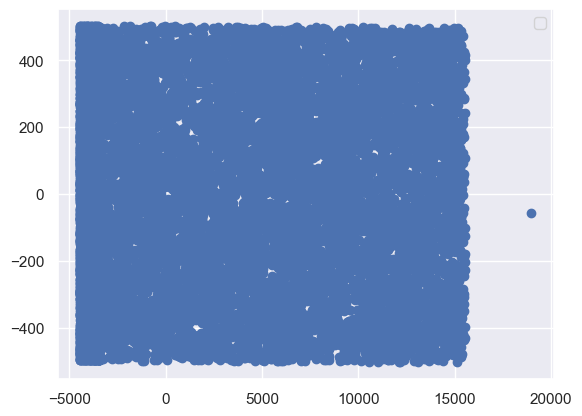

In [23]:
from sklearn.decomposition import PCA

# Using PCA from sklearn PCA
pca = PCA(n_components=2)
df_centered = df - df.mean(axis=0)
pca.fit(df_centered)
df_pca = pca.transform(df_centered)

# Plotting the results of PCA
plt.plot(df_pca[:, 0], df_pca[:, 1], "bo")
plt.legend(loc=0);

Ok, let me share another another evidence of that using kNN

<Axes: >

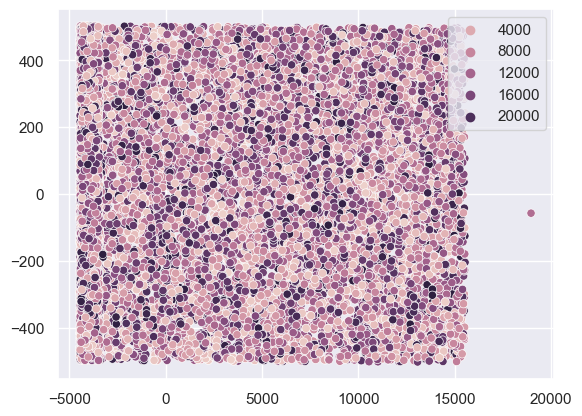

In [26]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')
knn.fit(df_pca)
distances, indices = knn.kneighbors(df_pca)

# Visualize the results of the KNN analysis
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=indices[:,1]);

Let's do the same steps with deleting random features:

In [28]:
df.drop(['normal_values', '% of normal values', 'param dist.'], axis=1, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


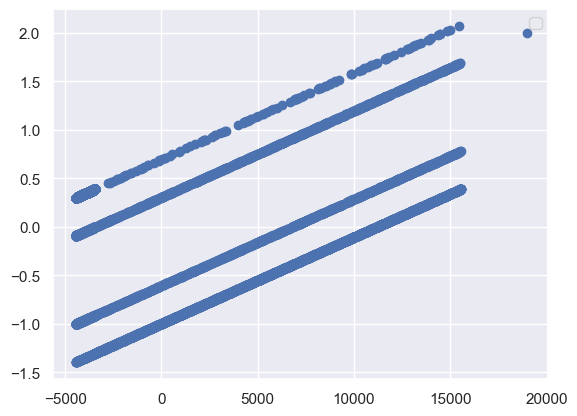

In [31]:
from sklearn.decomposition import PCA

# Using PCA from sklearn PCA
pca = PCA(n_components=4)
df_centered = df - df.mean(axis=0)
pca.fit(df_centered)
df_pca = pca.transform(df_centered)

# Plotting the results of PCA
plt.plot(df_pca[:, 0], df_pca[:, 1], "bo")
plt.legend(loc=0);

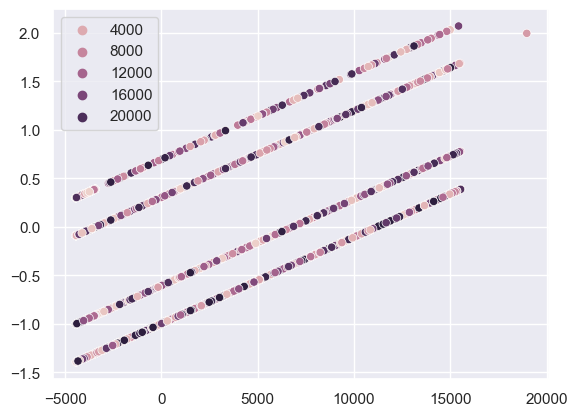

In [32]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=4, algorithm='ball_tree')
knn.fit(df_pca)
distances, indices = knn.kneighbors(df_pca)

# Visualize the results of the KNN analysis
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=indices[:,1]);

In both case we have observed particularly 4 groups within our dataset and of course one outlier. Again very interesting to investigate more about each group.